In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures


In [2]:
from scipy.io import loadmat

In [3]:
data = loadmat('ex5data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [4]:
y_train = np.c_[data['y']]
X_train = np.c_[np.ones_like(data['X']), data['X']]

yval = np.c_[data['yval']]
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]


print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Xval:', Xval.shape)
print('yval:', yval.shape)

X_train: (12, 2)
y_train: (12, 1)
Xval: (21, 2)
yval: (21, 1)


In [5]:
# X_test = np.c_[data['Xtest']]
X_test = np.c_[np.ones_like(data['Xtest']), data['Xtest']]
X_test

array([[  1.        , -33.31800399],
       [  1.        , -37.91216403],
       [  1.        , -51.20693795],
       [  1.        ,  -6.13259585],
       [  1.        ,  21.26118327],
       [  1.        , -40.31952949],
       [  1.        , -14.54153167],
       [  1.        ,  32.55976024],
       [  1.        ,  13.39343255],
       [  1.        ,  44.20988595],
       [  1.        ,  -1.14267768],
       [  1.        , -12.76686065],
       [  1.        ,  34.05450539],
       [  1.        ,  39.22350028],
       [  1.        ,   1.97449674],
       [  1.        ,  29.6217551 ],
       [  1.        , -23.66962971],
       [  1.        ,  -9.01180139],
       [  1.        , -55.94057091],
       [  1.        , -35.70859752],
       [  1.        ,   9.51020533]])

In [6]:
y_test = np.c_[data['ytest']]
y_test

array([[ 3.31688953],
       [ 5.39768952],
       [ 0.13042984],
       [ 6.1925982 ],
       [17.08848712],
       [ 0.79950805],
       [ 2.82479183],
       [28.62123334],
       [17.04639081],
       [55.38437334],
       [ 4.07936733],
       [ 8.27039793],
       [31.32355102],
       [39.15906103],
       [ 8.08727989],
       [24.11134389],
       [ 2.4773548 ],
       [ 6.56606472],
       [ 6.0380888 ],
       [ 4.69273956],
       [10.83004606]])

In [7]:
y_train

array([[ 2.13431051],
       [ 1.17325668],
       [34.35910918],
       [36.83795516],
       [ 2.80896507],
       [ 2.12107248],
       [14.71026831],
       [ 2.61418439],
       [ 3.74017167],
       [ 3.73169131],
       [ 7.62765885],
       [22.7524283 ]])

In [8]:
X_train

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

In [9]:
Xval

array([[  1.        , -16.74653578],
       [  1.        , -14.57747075],
       [  1.        ,  34.51575866],
       [  1.        , -47.01007574],
       [  1.        ,  36.97511905],
       [  1.        , -40.68611002],
       [  1.        ,  -4.47201098],
       [  1.        ,  26.53363489],
       [  1.        , -42.7976831 ],
       [  1.        ,  25.37409938],
       [  1.        , -31.10955398],
       [  1.        ,  27.31176864],
       [  1.        ,  -3.26386201],
       [  1.        ,  -1.81827649],
       [  1.        , -40.7196624 ],
       [  1.        , -50.01324365],
       [  1.        , -17.41177155],
       [  1.        ,   3.5881937 ],
       [  1.        ,   7.08548026],
       [  1.        ,  46.28236902],
       [  1.        ,  14.61228909]])

In [10]:
yval

array([[ 4.17020201e+00],
       [ 4.06726280e+00],
       [ 3.18730676e+01],
       [ 1.06236562e+01],
       [ 3.18360213e+01],
       [ 4.95936972e+00],
       [ 4.45159880e+00],
       [ 2.22763185e+01],
       [-4.38738274e-05],
       [ 2.05038016e+01],
       [ 3.85834476e+00],
       [ 1.93650529e+01],
       [ 4.88376281e+00],
       [ 1.10971588e+01],
       [ 7.46170827e+00],
       [ 1.47693464e+00],
       [ 2.71916388e+00],
       [ 1.09269007e+01],
       [ 8.34871235e+00],
       [ 5.27819280e+01],
       [ 1.33573396e+01]])

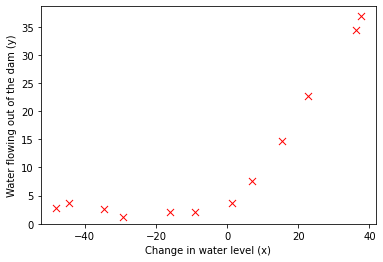

In [11]:
plt.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.ylim(ymin=0);

In [12]:
mean_ciw = sum((X_train[:,1]))/(len(X_train[:,1]))
mean_ciw

-5.085426348834809

In [13]:
mean_wfo = float(sum(y_train[:])/float((len(y_train[:]))))
mean_wfo

11.217589325366376

In [14]:
# calculating variance

def variance(values, mean):
    variance = 0
    for val in values:
        variance = float(variance + ((val-mean)**2))
    return variance

In [15]:
# A simple way to write the above def for variance
# def variance(values, mean):
#     return sum([(val-mean)**2 for val in values])
# variance(X_train[:,1], mean_ciw)

In [16]:
variance_ciw = variance(X_train[:,1], mean_ciw)
variance_ciw

9876.519270389965

In [17]:
variance_wfo = variance(y_train, mean_wfo)
variance_wfo

1872.8871778624105

In [18]:
# calculating covariance 

def covariance(inparm, output, mean_input, mean_output):
    covariance = 0
    for i in range(len(output)):
        covariance = (covariance + ((inparm[i] - mean_input)*(output[i] - mean_output)))
    return covariance

In [19]:
covariance_final = float(covariance(X_train[:,1], y_train[:], mean_ciw, mean_wfo))
covariance_final

3632.3786498320987

In [20]:
# Linear Fitting of parameters 
# guiding equation Y = mX+c
# slope(m), constant(c)
m = covariance_final/variance_ciw
c = mean_wfo - (m*mean_ciw)
m,c

(0.36777922974565086, 13.08790351086908)

In [21]:
# prediction
wfo = (m*float(input("enter the change in reservoir levels"))+c)
print('the predicted water flowing out from model =', wfo)

enter the change in reservoir levels15
the predicted water flowing out from model = 18.60459195705384


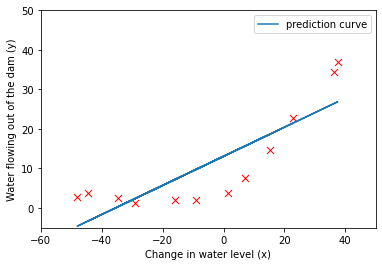

In [22]:
# fitting the obtained regression equation to the data 

x = X_train[:,1]
y = (m*x)+c

# fig = plt.figure()
plt.plot(x,y, label = 'prediction curve')
# plt.show()

plt.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.ylim(ymin=-5, ymax=50)
plt.xlim(xmin = -60, xmax=50)
plt.legend(loc = 1);


8.379456541593012
53.158474666253625
46.930363369648234
29.268016730916468
19.826464515007515
8.773025965729499
32.84253175762056
17.21563954334642
1.2721555289869708
921.6466009716866
100.2756545155636
0.02027459204371723
44.342840841409746
184.37592685480234
44.58689385376985
0.022684737231578714
4.935516111549354
13.986601018487645
248.6513981014328
30.515532396272206
45.035081169401245


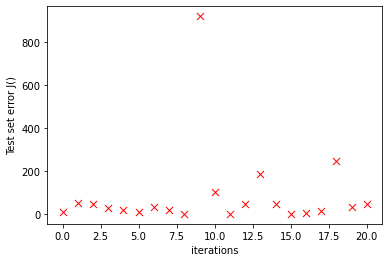

In [23]:
# calculating linear regression error
# J is the cost function 
# Jtest is the test set error
# H is the hypothesis (y) = mx + c 
for i in range(len(X_test)):
    H = (m * X_test[i,1])+c
#     print(H)
    Jtest = (1/(2*m))*(sum((H - y_test[i])**2))
    print(Jtest)
    plt.scatter(i, Jtest, s=50, c='r', marker ='x', linewidths=1)
    plt.xlabel('iterations')
    plt.ylabel('Test set error J()')
    

In [34]:
error_train = np.zeros((m,1))

error_val = np.zeros((m,1))

error_train, error_val

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))